# Cavendish

In [88]:
import matplotlib.pyplot as plt
from pre_process import *
from outcome import *

## PreProcess Data

### Preview Image to Determine y-bound

TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50839 (0xc697) encountered.


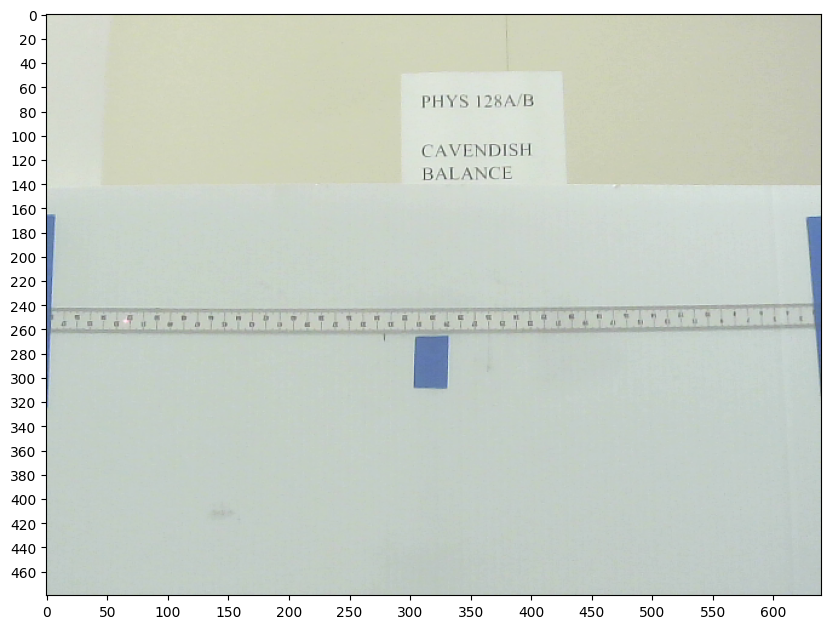

/tmp/ipykernel_200612/2087283502.py:37: RuntimeWarning: Mean of empty slice.
  x_mean, y_mean = np.array(x_sum).mean(), np.array(y_sum).mean()
/usr/lib/python3/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(253.66666666666666, 65.5)

In [229]:
image = preview_images("./s1/pos1_1.tif", 1, plotting=True)
get_laser_pos(image)

### Find the Initial Position and Calculate the Average Conversion factor

In [230]:
y_bound = [238, 262]
conver_mean, conver_std, init_pos = conver_factor_and_init_pos(y_bound)


TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50839 (0xc697) encountered.
/tmp/ipykernel_200612/2087283502.py:37: RuntimeWarning: Mean of empty slice.
  x_mean, y_mean = np.array(x_sum).mean(), np.array(y_sum).mean()
TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50839 (0xc697) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50839 (0xc697) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50839 (0xc697) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50839 (0xc697) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) e




The average of the conversion is 0.08848496781922152 with std of 0.003912583171924163
Conversion_list =  [0.08110124481525856, 0.09115899119214552, 0.09281701000607953, 0.08538400174909627, 0.08865508275442194, 0.0938013169998888, 0.08645491631332795, 0.08850717872355358] 
 initial_position_list =  [[51.3, 12.2, 50.8, 45.7], [20.9, 3.8, 24.6, 12.3]]






### Find Displacement of Laser Dot and Plot All Graphs

TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50839 (0xc697) encountered.
/tmp/ipykernel_200612/2087283502.py:37: RuntimeWarning: Mean of empty slice.
  x_mean, y_mean = np.array(x_sum).mean(), np.array(y_sum).mean()
TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50839 (0xc697) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50839 (0xc697) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50839 (0xc697) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50839 (0xc697) encountered.
TIFFReadDirectory: Warning, Unknown field with tag 50838 (0xc696) e

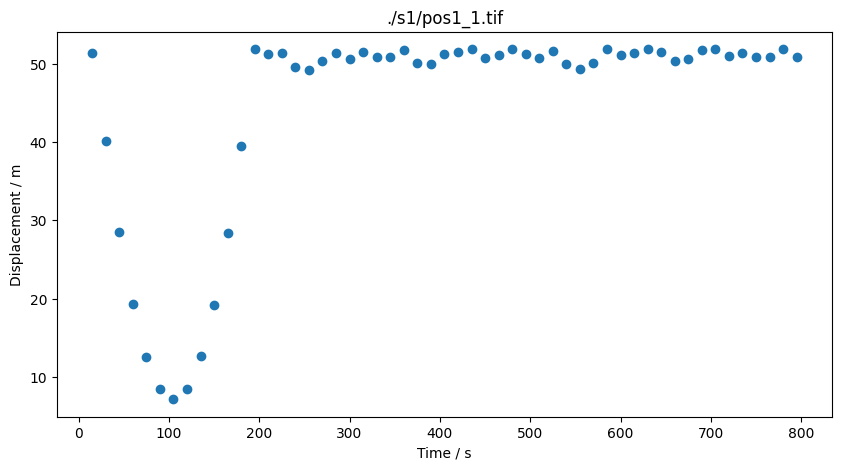

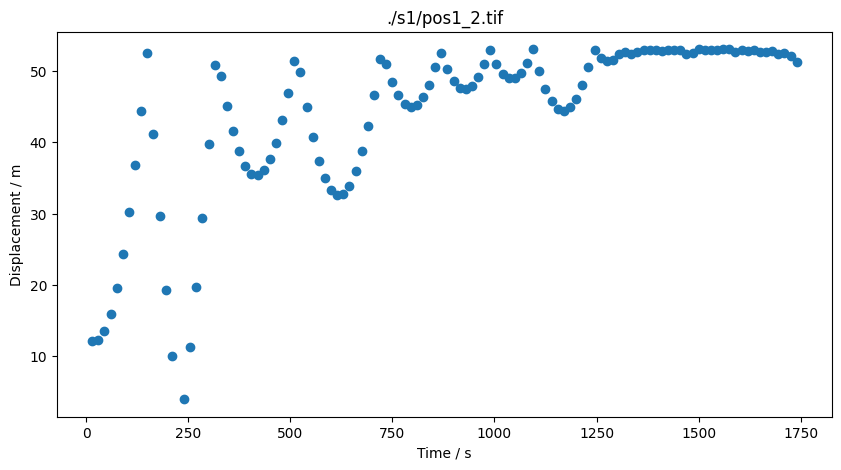

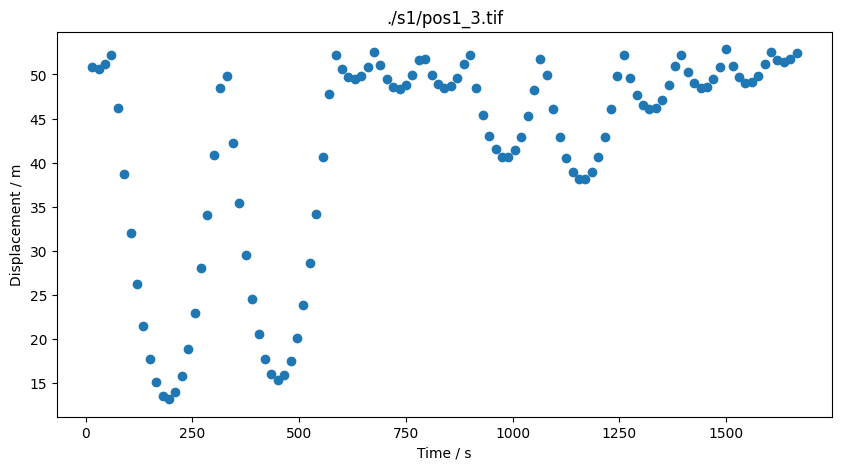

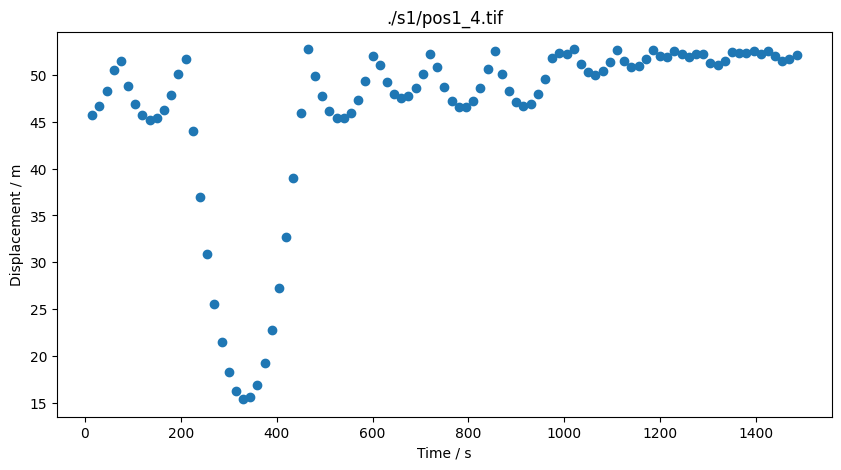

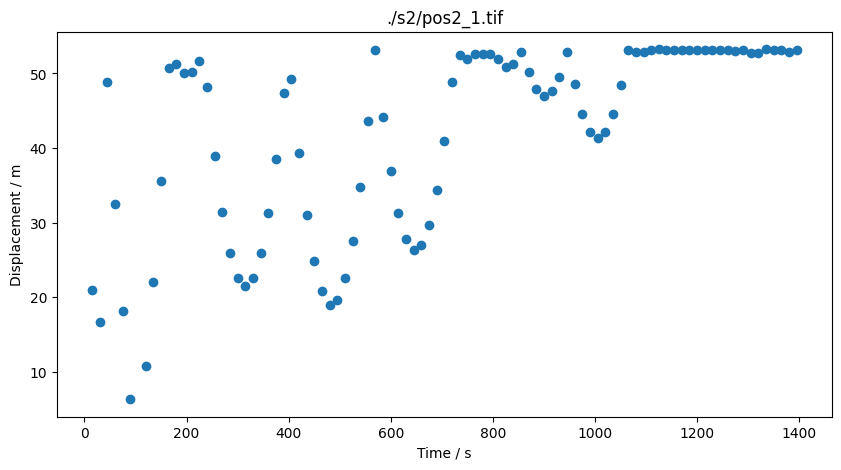

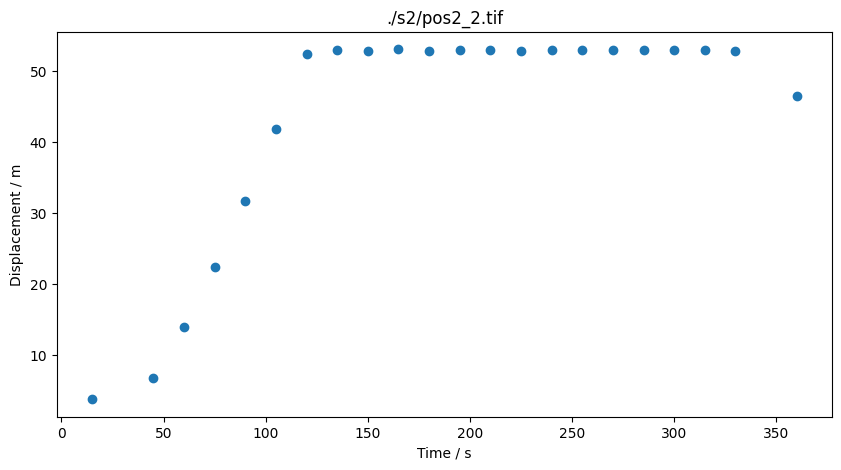

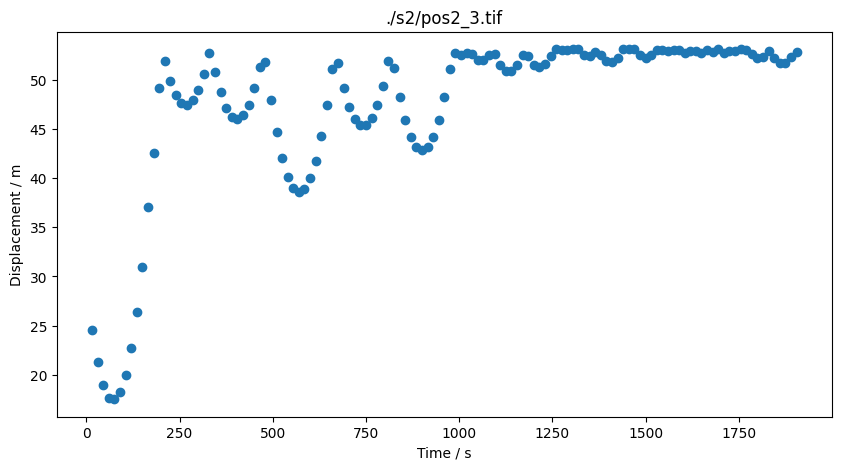

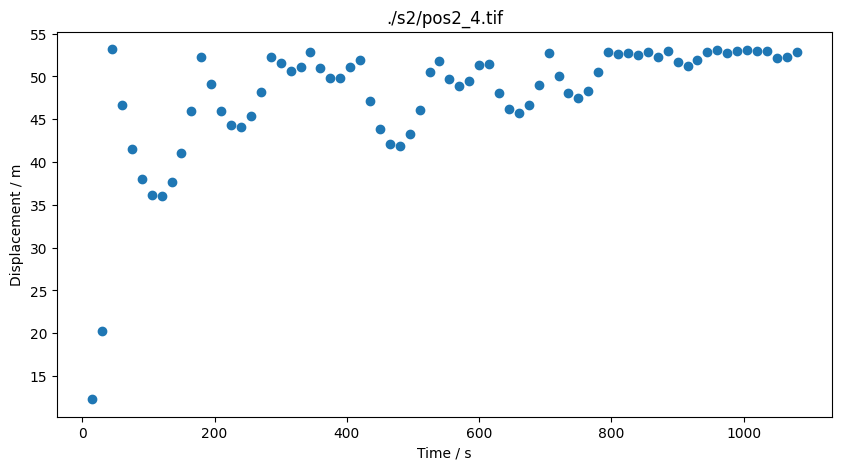

In [231]:
folder = ["./s1/", "./s2/"]
f_location = [[] for i in range(len(init_pos))]
for i in range(len(init_pos)):
    for j in range(len(init_pos[i])):
            f_location[i].append(folder[i] + f"pos{i+1}_{j+1}.tif")


x_list = [[] for i in range(len(init_pos))]
y_list = [[] for i in range(len(init_pos))]
for i in range(len(init_pos)):
    for j in range(len(init_pos[i])):
        pix_pos, img_num = gen_pix_pos(f_location[i][j], y_bound)
        pos_cm = get_x(pix_pos, init_pos[i][j], conver_mean)
        T = 15
        x, y = plot_dots(img_num, pos_cm, T)
        x_list[i].append(x)
        y_list[i].append(y)

        plt.title(f"{f_location[i][j]}")


## Calcualte Big G

### Calculate delta_S and T for S1

In [238]:
x = x_list[0][0]
y = y_list[0][0]

Text(0, 0.5, 'Displacement / m')

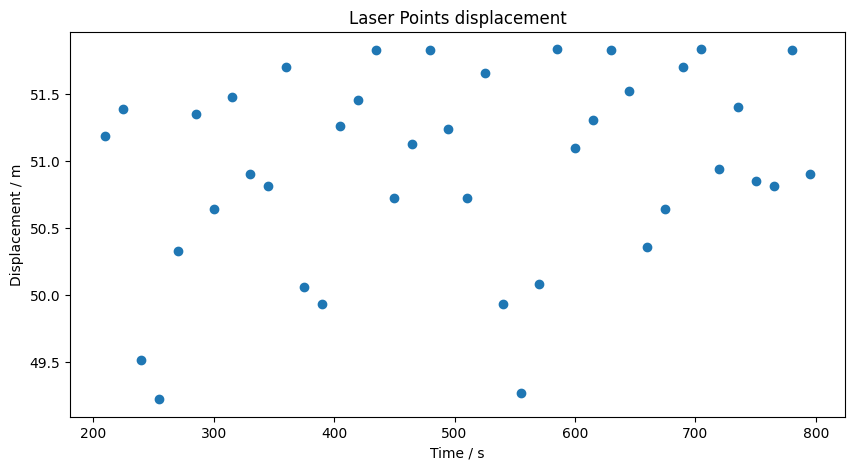

In [244]:
start = 13
x, y = x[start:], y[start:]
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.title("Laser Points displacement")
plt.xlabel("Time / s")
plt.ylabel("Displacement / m")

amplitude = 2.367925575412987 +- 1.594731780220221
decay_const = 0.003567571794116427 +- 0.001842943664203586
ang_freq = 0.043548284289588124 +- 0.0016376402361159036
phase = -7.8753613140670184 +- 0.5676710851106277
const = 50.9733887472209 +- 0.08215425289889483


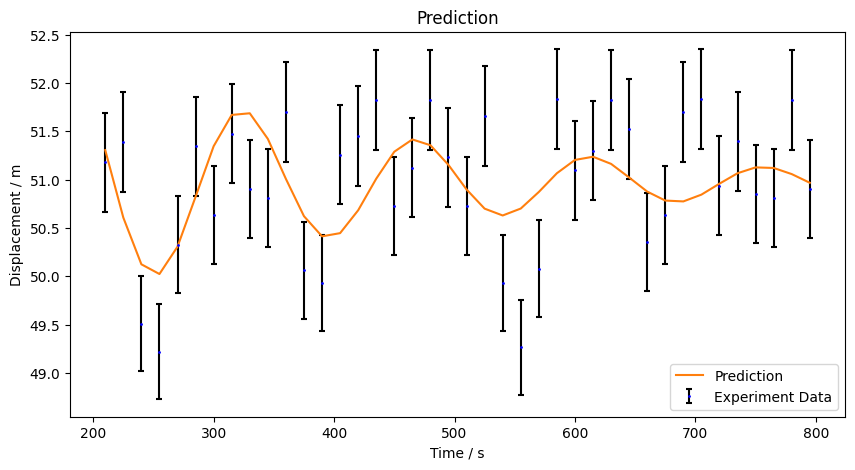

In [245]:
ang_freq1, const_s1 = get_fit_para(x, y, y_uncer=0.01*y)

### Calculate delta_S and T for S2

In [253]:
x = x_list[1][0]
y = y_list[1][0]

Text(0, 0.5, 'Displacement / m')

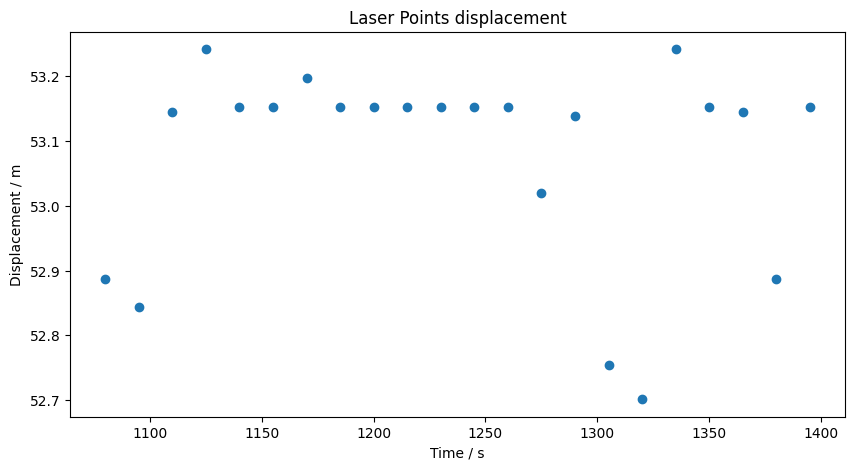

In [254]:
start = 71
x, y = x[start:], y[start:]
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.title("Laser Points displacement")
plt.xlabel("Time / s")
plt.ylabel("Displacement / m")

amplitude = 105.39417612713315 +- 2715.806248825927
decay_const = 0.005562593871617782 +- 0.02183113694052939
ang_freq = 0.022983274454306712 +- 0.018317514966987365
phase = -14.616048384455544 +- 21.34710060409275
const = 53.07071683201428 +- 0.14048239230235823


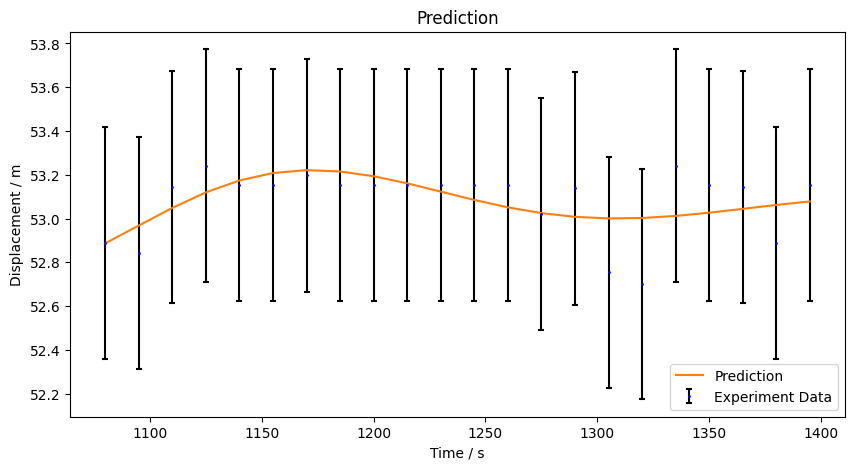

In [255]:
ang_freq2, const_s2 = get_fit_para(x, y, y_uncer=0.01*y)

### Evaluating G

In [257]:
s1 = const_s1
s2 = 59
delta_S = abs(s1-s2) / 100
T = 2*np.pi/((ang_freq1+ang_freq2)/2)

In [260]:
b = 42.2 / 1000
d = 50 / 1000
r = 9.55 / 1000
m1 = 1.5
L = 1.765
G = 6.67 * 10**(-11)


# G_cal = get_G(delta_S, T, b, d, r, m1, L)

def get_G(delta_S, T):
    factor = np.pi ** (2) * delta_S * b ** (2)
    nominator = d**(2) + (2/5) * r ** 2
    denominator = T**2 * m1 * L * d
    return factor * nominator / denominator

In [261]:
# (G_cal - G) / G

(get_G(delta_S, T) - G) / G

10.360366757159676